In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report/2015.csv
/kaggle/input/world-happiness-report/2021.csv
/kaggle/input/world-happiness-report/2017.csv
/kaggle/input/world-happiness-report/2019.csv
/kaggle/input/world-happiness-report/2020.csv
/kaggle/input/world-happiness-report/2018.csv
/kaggle/input/world-happiness-report/2022.csv
/kaggle/input/world-happiness-report/2016.csv


# World Happiness Analysis with Data Visualization

### Index

1. [Importing Libraries and Adjusting Parameters](#section-one)
2. [Importing Datasets](#section-two)
3. [Let's take a glimpse into what each dataset has to provide](#section-three)
4. [Exploring 2021](#section-four)  
    4.1. [Univariate Analysis](#section-four-one)  
    4.2. [Multivariate Analysis](#section-four-two)  
5. [Let's see how the top five and the bottom five countries of 2021 climbed/dwindled to their current ranks over the years since 2015](#section-five)  
    5.1. [Finding Top 5 and Bottom 5 countries](#section-five-one)  
    5.2. [Organizing the data and Constructing the DataFrame](#section-five-two)  
    5.3. [Plotting](#section-five-three)  
    5.4. [Observations](#section-five-four)  
6. [How can we stay Happy no matter where we are born?](#section-six)


<a id="section-one"></a>
## 1. Importing Libraries and Adjusting Parameters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='section-two'></a>
## 2. Importing Datasets

In [3]:
whr2015 = pd.read_csv('/kaggle/input/world-happiness-report/2015.csv')
whr2016 = pd.read_csv('/kaggle/input/world-happiness-report/2016.csv')
whr2017 = pd.read_csv('/kaggle/input/world-happiness-report/2017.csv')
whr2018 = pd.read_csv('/kaggle/input/world-happiness-report/2018.csv')
whr2019 = pd.read_csv('/kaggle/input/world-happiness-report/2019.csv')
whr2020 = pd.read_csv('/kaggle/input/world-happiness-report/2020.csv')
whr2021 = pd.read_csv('/kaggle/input/world-happiness-report/2021.csv')

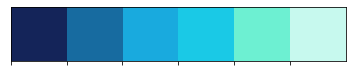

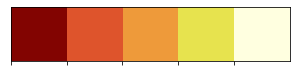

In [4]:
cold = ['#142459','#176ba0','#19aade','#1ac9e6','#6df0d2','#c7f9ee']
warm = ['#820401','#DE542C','#EE9A3A','#E7E34E','#FFFFE0']

blues = sns.color_palette(cold)
reds = sns.color_palette(warm)

sns.palplot(blues,size=1)
sns.palplot(reds,size=1)


<a id='section-three'></a>
## 3. Let's take a glimpse into what each dataset has to provide

In [5]:
pd.DataFrame({'2015':pd.Series(whr2015.columns),'2016':pd.Series(whr2016.columns),'2017':pd.Series(whr2017.columns),'2018':pd.Series(whr2018.columns),'2019':pd.Series(whr2019.columns),'2020':pd.Series(whr2020.columns),'2021':pd.Series(whr2021.columns)})

,2015,2016,2017,2018,2019,2020,2021
0,Country,Country,Country,Overall rank,Overall rank,Country name,Country name
1,Region,Region,Happiness.Rank,Country or region,Country or region,Regional indicator,Regional indicator
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score,Ladder score,Ladder score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita,Standard error of ladder score,Standard error of ladder score
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support,upperwhisker,upperwhisker
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy,lowerwhisker,lowerwhisker
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices,Logged GDP per capita,Logged GDP per capita
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity,Social support,Social support
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption,Healthy life expectancy,Healthy life expectancy
9,Trust (Government Corruption),Freedom,Generosity,NaN,NaN,Freedom to make life choices,Freedom to make life choices


All of the yearly datasets have the data transformed into different forms. Only reliable variable that is same across all the datasets is 'Happiness Score' or 'Ladder Score' which can be used to plot the Happiness progress of various countries from 2015 to 2021.

<a id='section-four'></a>
## 4. Exploring 2021

In [6]:
whr2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
whr2021.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [8]:
whr2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [9]:
whr2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

<a id='section-four-one'></a>
## 4.1 Univariate Analysis

### 4.1.1 Let's see the Histogram and distribution of each parameter

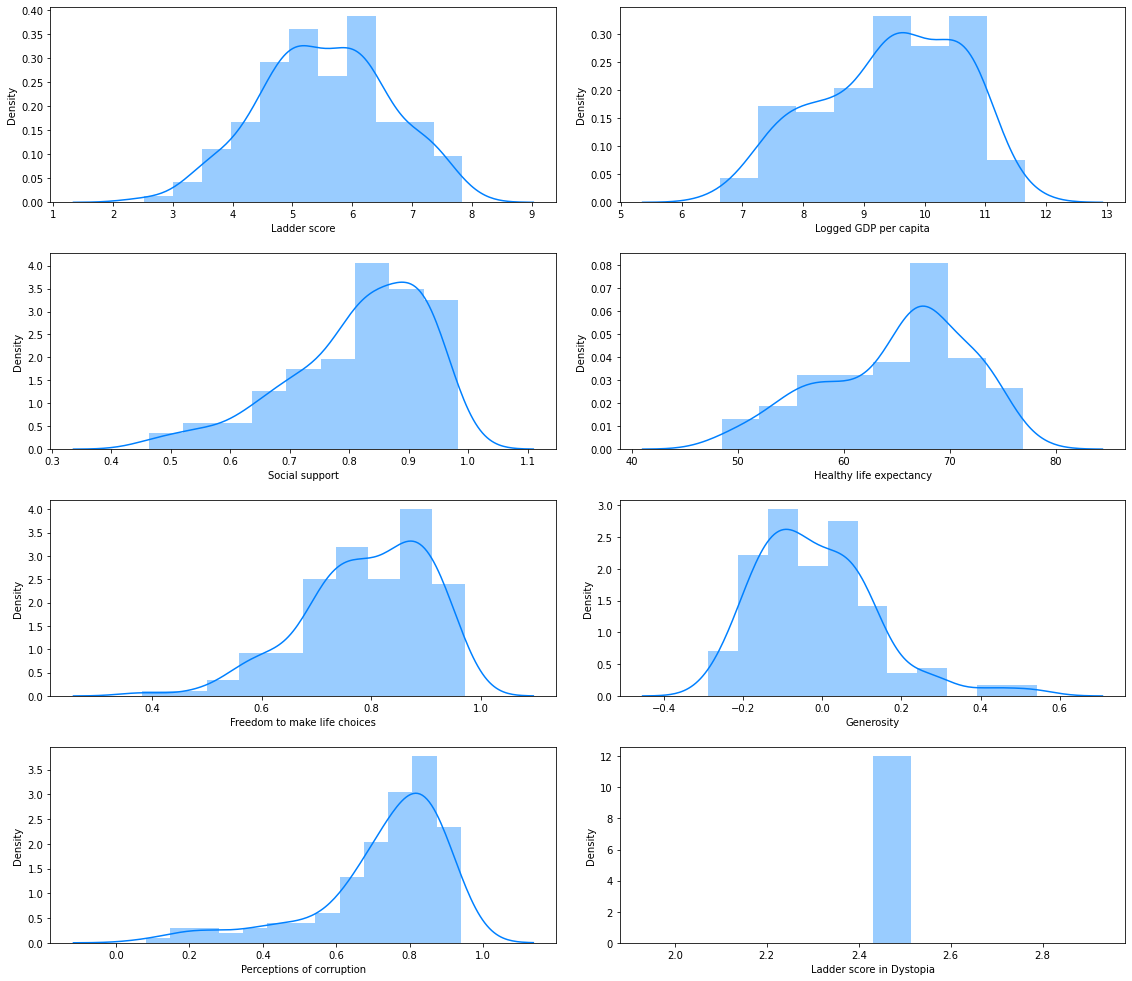

In [10]:
fig, ax = plt.subplots(4,2,figsize=(16,14))
sns.distplot(whr2021['Ladder score'], ax = ax[0,0], color = '#0080ff')
sns.distplot(whr2021['Logged GDP per capita'], ax = ax[0,1], color = '#0080ff')
sns.distplot(whr2021['Social support'], ax = ax[1,0], color = '#0080ff')
sns.distplot(whr2021['Healthy life expectancy'], ax = ax[1,1], color = '#0080ff')
sns.distplot(whr2021['Freedom to make life choices'], ax = ax[2,0], color = '#0080ff')
sns.distplot(whr2021['Generosity'], ax = ax[2,1], color = '#0080ff')
sns.distplot(whr2021['Perceptions of corruption'], ax = ax[3,0], color = '#0080ff')
sns.distplot(whr2021['Ladder score in Dystopia'], ax = ax[3,1], color = '#0080ff')
fig.tight_layout(pad=2)

### 4.1.2 What does this mean?
  
1. The Ladder score or Happiness score depicts a normal distribution among all the countries which is a surprising result.
2. The social support around the world seems almost right skewed.
3. Most people around the world have health life expetancy around 70 years of age.
4. Most people around the world have a significant perception of corruption in their national government.

### 4.1.3 How many countries in each regional division?

Text(0.5, 1.0, 'Number of countries in each Region')

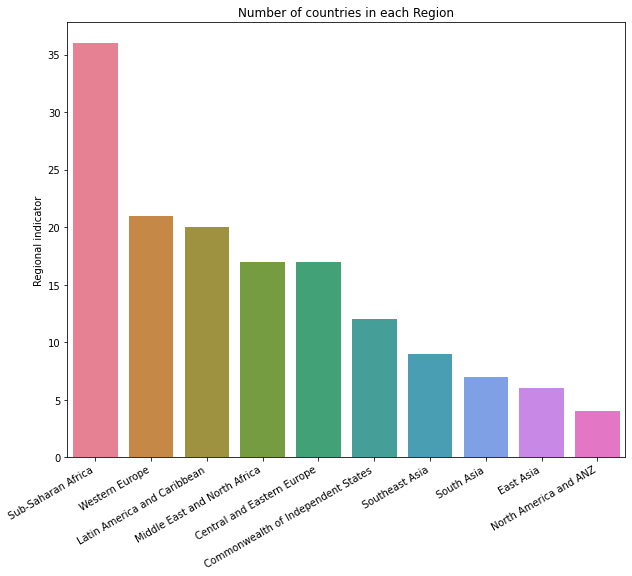

In [11]:
regions = whr2021['Regional indicator'].value_counts().index.tolist()
values = whr2021['Regional indicator'].value_counts()
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(regions,values,palette='husl',ax = ax)
plt.xticks(rotation=30, ha='right')
plt.title('Number of countries in each Region')

### 4.1.4 Let's compare the mean of ladder scores from each regional division to other divisions

Regional indicator
South Asia                            4.441857
Sub-Saharan Africa                    4.494472
Middle East and North Africa          5.219765
Southeast Asia                        5.407556
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Central and Eastern Europe            5.984765
Western Europe                        6.914905
North America and ANZ                 7.128500
Name: Ladder score, dtype: float64


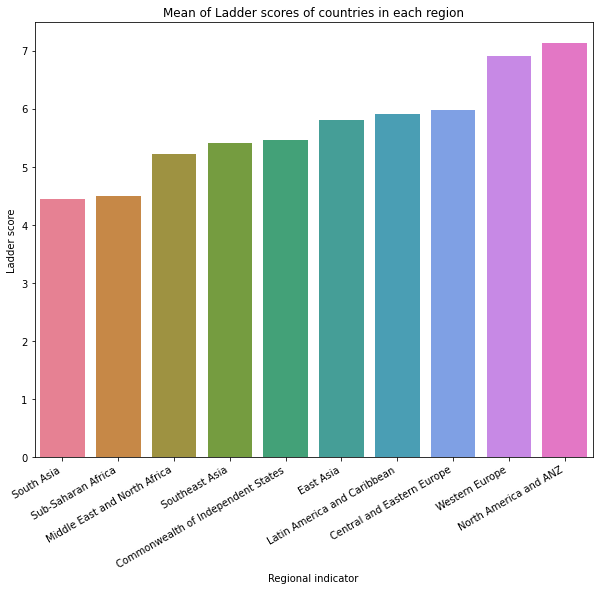

In [12]:
mean_values = whr2021.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending = True)
regions_in_mean_list  = mean_values.index

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(regions_in_mean_list,mean_values,palette='husl',ax = ax)
plt.xticks(rotation=30, ha='right')
plt.title('Mean of Ladder scores of countries in each region')
print(mean_values)

### 4.1.5 Who are the top 10 and least 10 happiest countries in the world?

  Country name  Ladder score     Regional indicator
0      Finland         7.842         Western Europe
1      Denmark         7.620         Western Europe
2  Switzerland         7.571         Western Europe
3      Iceland         7.554         Western Europe
4  Netherlands         7.464         Western Europe
5       Norway         7.392         Western Europe
6       Sweden         7.363         Western Europe
7   Luxembourg         7.324         Western Europe
8  New Zealand         7.277  North America and ANZ
9      Austria         7.268         Western Europe
    Country name  Ladder score            Regional indicator
148  Afghanistan         2.523                    South Asia
147     Zimbabwe         3.145            Sub-Saharan Africa
146       Rwanda         3.415            Sub-Saharan Africa
145     Botswana         3.467            Sub-Saharan Africa
144      Lesotho         3.512            Sub-Saharan Africa
143       Malawi         3.600            Sub-Saharan Africa
1

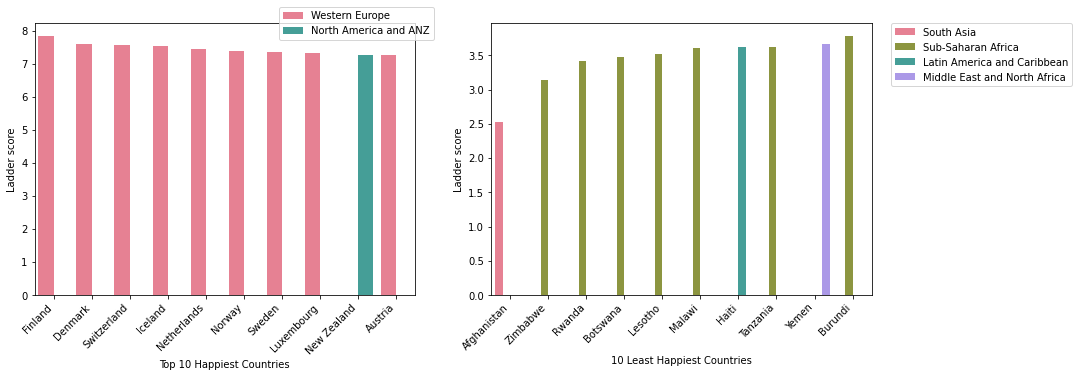

In [13]:
top10 = whr2021.sort_values('Ladder score',ascending=False)[['Country name','Ladder score','Regional indicator']].head(10)
bottom10 = whr2021.sort_values('Ladder score',ascending=True)[['Country name','Ladder score','Regional indicator']].head(10)
print(top10)
print(bottom10)

fig, ax = plt.subplots(1,2,figsize=(15,5))

def bar_of_ranks(df,axes,loc,label):
    sns.barplot(data = df, x = 'Country name',y = 'Ladder score',palette = 'husl', hue = 'Regional indicator',ax = ax[axes])
    ax[axes].set_xticks(ax[axes].get_xticks(), ax[axes].get_xticklabels(), rotation=45, ha='right')
    ax[axes].set_xlabel(label)
    ax[axes].legend(bbox_to_anchor=(1.05, 1), loc=loc, borderaxespad=0)

bar_of_ranks(top10,0,'right','Top 10 Happiest Countries')
bar_of_ranks(bottom10,1,'best','10 Least Happiest Countries')


<a id='section-four-two'></a>
## 4.2 Multivariate Analysis

### 4.2.1 Correlation Matrix

<AxesSubplot:>

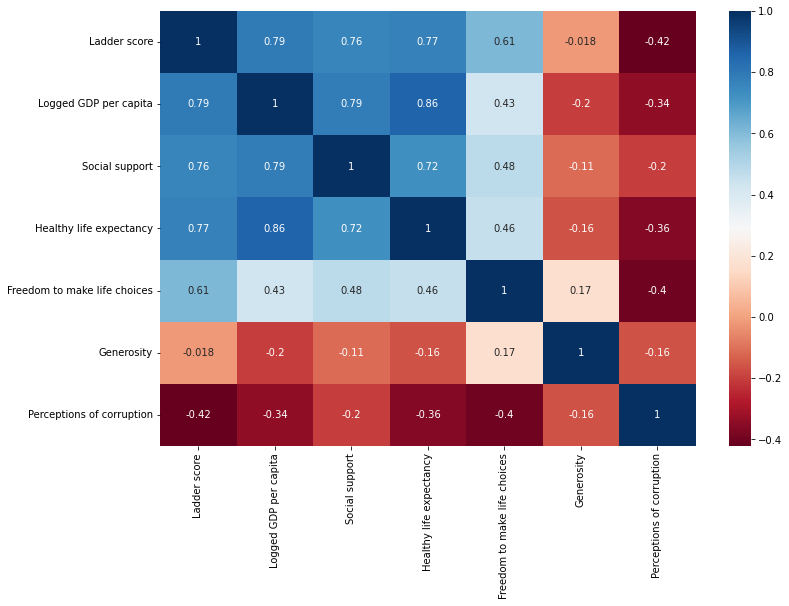

In [14]:
cols = ['Ladder score',
'Logged GDP per capita',
'Social support',
'Healthy life expectancy',
'Freedom to make life choices',
'Generosity',
'Perceptions of corruption',
       'Regional indicator']

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(whr2021[cols].corr(), annot=True, cmap="RdBu",ax=ax)

### 4.2.2 What does the grid show?

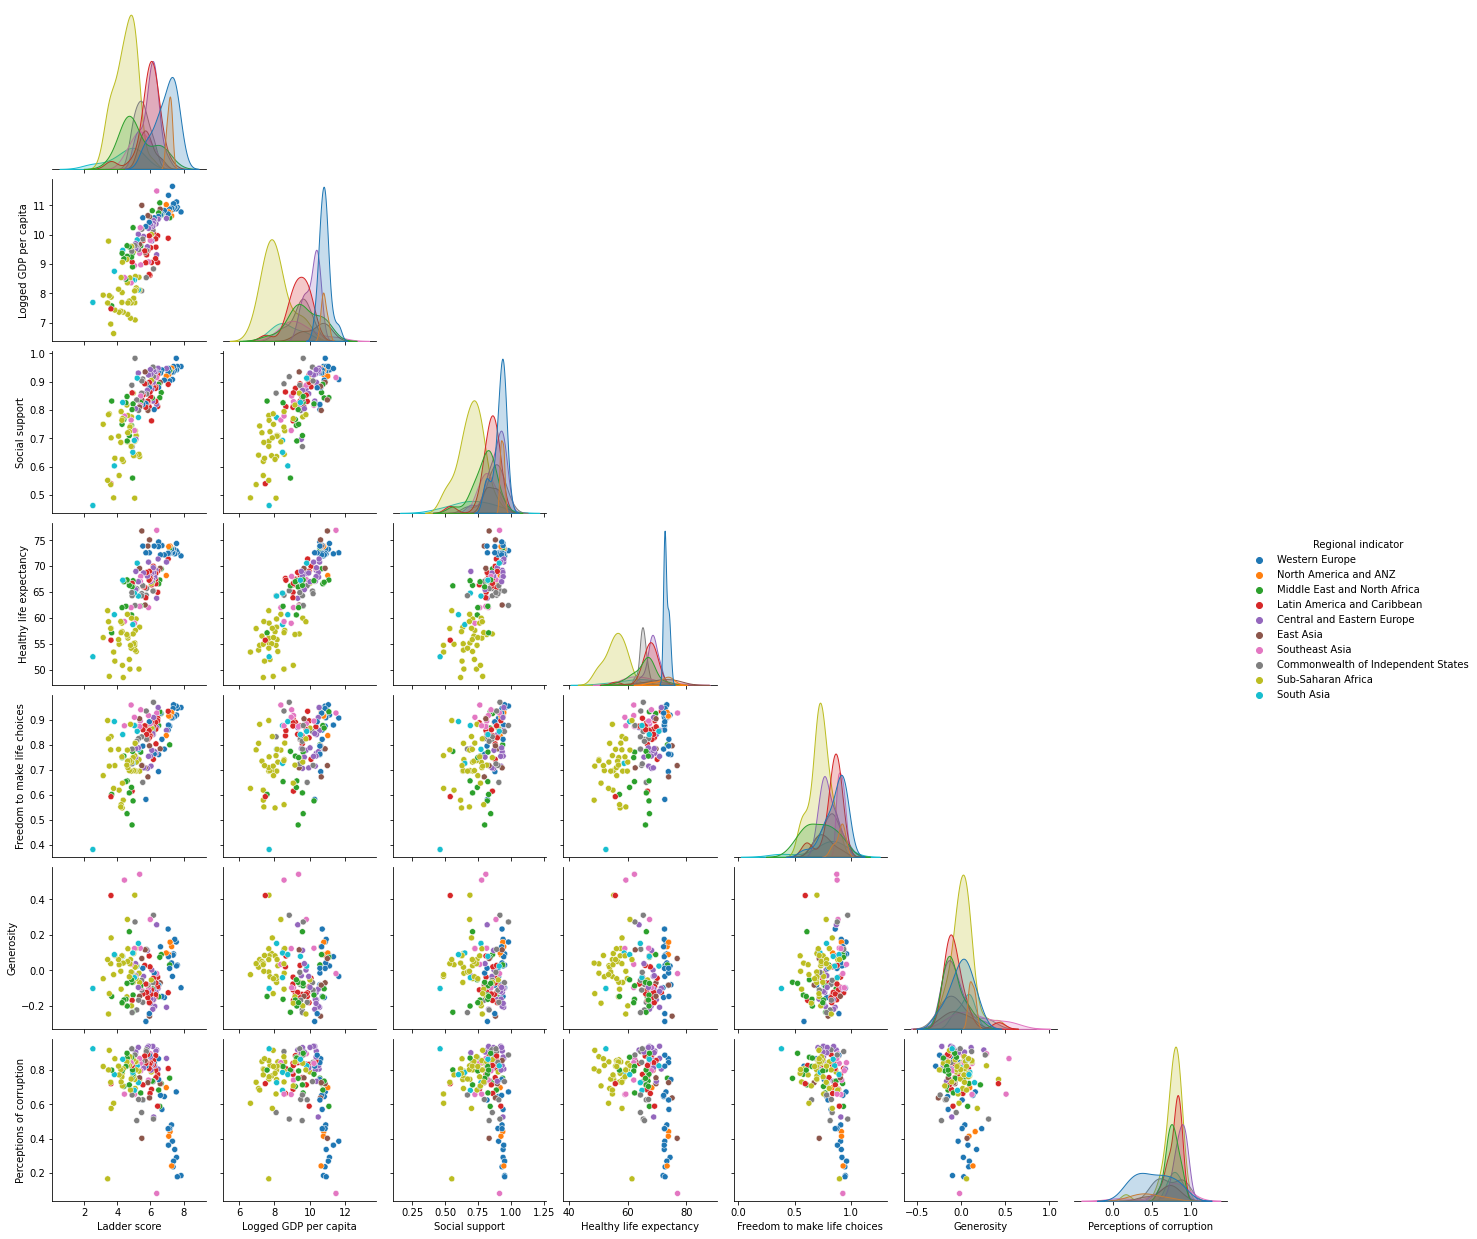

In [15]:
sns.pairplot(whr2021[cols], hue = 'Regional indicator',corner = True)

### 4.2.3 What does it mean?  
  
1. People tend to be happy when they have more freedom to make life choices, better health life expetancy, good social support, and more money i.e. GDP per capita.  
2. Higher GDP per capita indicates availability of strong social support and healthy life expetancy.
3. Social support tends to lead an individual to live healthy life.
4. Surprisingly, Generosity shows almost none relation with happiness rank of the nation, neither in any other factors.
5. Interestingly, higher perception of corruption in one's nation not only affects their GDP but also Healthy life expectancy and Freedom to make life choices!

### 4.2.4 Visualizing the Ladder score distribution for each regional division

<AxesSubplot:xlabel='Ladder score', ylabel='Density'>

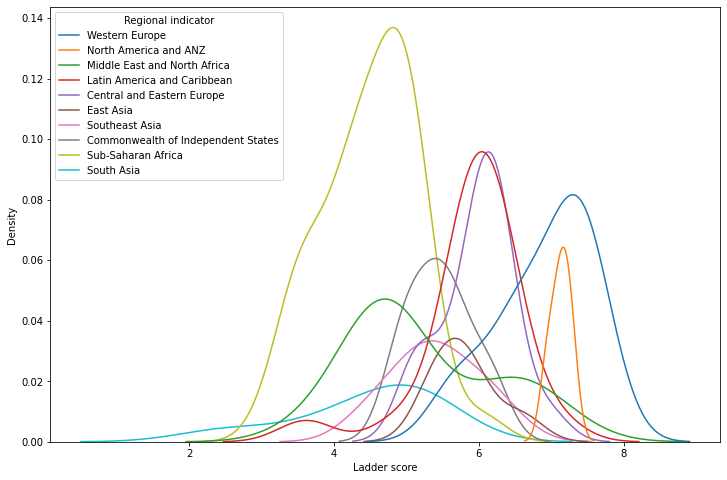

In [16]:
plt.figure(figsize=(12,8))
sns.kdeplot(whr2021['Ladder score'], hue = whr2021['Regional indicator'])

While the Sub-saharan countries have a extremely steep distribution with Ladder score almost near 5, western European countries seem to enjoy a mean Ladder score above 7. Interestingly, South Asian countries have wide range of ladder scores, some even lower than almost all the countries in the world and some even rivaling the top most countries.

<a id='section-five'></a>
## 5. Let's see how the top five and the bottom five countries of 2021 climbed/dwindled to their current ranks over the years since 2015

<a id='section-five-one'></a>
### 5.1 Finding Top 5 and Bottom 5 countries

In [17]:
top2021 = list(whr2021.sort_values(by='Ladder score',ascending = False)['Country name'].head(5))
bottom2021 = list(whr2021.sort_values(by='Ladder score',ascending = True)['Country name'].head(5))
print(top2021)
print(bottom2021)

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands']
['Afghanistan', 'Zimbabwe', 'Rwanda', 'Botswana', 'Lesotho']


<a id='section-five-two'></a>
### 5.2 Organizing the data and Constructing the DataFrame

In [18]:
years = ['2015','2016','2017','2018','2019','2020','2021']

def fetch_ladderscore(country):
    val2015 = whr2015.loc[whr2015['Country'] == country,'Happiness Score'].iloc[0]
    val2016 = whr2016.loc[whr2016['Country'] == country,'Happiness Score'].iloc[0]
    val2017 = whr2017.loc[whr2017['Country'] == country,'Happiness.Score'].iloc[0]
    val2018 = whr2018.loc[whr2018['Country or region'] == country,'Score'].iloc[0]
    val2019 = whr2019.loc[whr2019['Country or region'] == country,'Score'].iloc[0]
    val2020 = whr2020.loc[whr2020['Country name'] == country,'Ladder score'].iloc[0]
    val2021 = whr2021.loc[whr2021['Country name'] == country,'Ladder score'].iloc[0]
    
    value_list = [val2015,val2016,val2017,val2018,val2019,val2020,val2021]
    return value_list
    
Finland = fetch_ladderscore('Finland')
Denmark = fetch_ladderscore('Denmark')
Switzerland = fetch_ladderscore('Switzerland')
Iceland = fetch_ladderscore('Iceland')
Netherlands = fetch_ladderscore('Netherlands')

df_top = pd.DataFrame({'Finland':Finland,'Denmark':Denmark,'Switzerland':Switzerland,'Iceland':Iceland,'Netherlands':Netherlands},index=years)
df_top.head(10)

,Finland,Denmark,Switzerland,Iceland,Netherlands
2015,7.4060,7.5270,7.5870,7.5610,7.3780
2016,7.4130,7.5260,7.5090,7.5010,7.3390
2017,7.4690,7.5220,7.4940,7.5040,7.3770
2018,7.6320,7.5550,7.4870,7.4950,7.4410
2019,7.7690,7.6000,7.4800,7.4940,7.4880
2020,7.8087,7.6456,7.5599,7.5045,7.4489
2021,7.8420,7.6200,7.5710,7.5540,7.4640


In [19]:
Afghanistan = fetch_ladderscore('Afghanistan')
Zimbabwe = fetch_ladderscore('Zimbabwe')
Rwanda = fetch_ladderscore('Rwanda')
Botswana = fetch_ladderscore('Botswana')
#Lesotho record not available for 2016

df_bottom = pd.DataFrame({'Afghanistan':Afghanistan,'Zimbabwe':Zimbabwe,'Rwanda':Rwanda,'Botswana':Botswana},index=years)
df_bottom.head(10)

,Afghanistan,Zimbabwe,Rwanda,Botswana
2015,3.5750,4.6100,3.4650,4.3320
2016,3.3600,4.1930,3.5150,3.9740
2017,3.7940,3.8750,3.4710,3.7660
2018,3.6320,3.6920,3.4080,3.5900
2019,3.2030,3.6630,3.3340,3.4880
2020,2.5669,3.2992,3.3123,3.4789
2021,2.5230,3.1450,3.4150,3.4670


<a id='section-five-three'></a>
### 5.3 Plotting

Text(0, 0.5, 'Ladder / Happiness score')

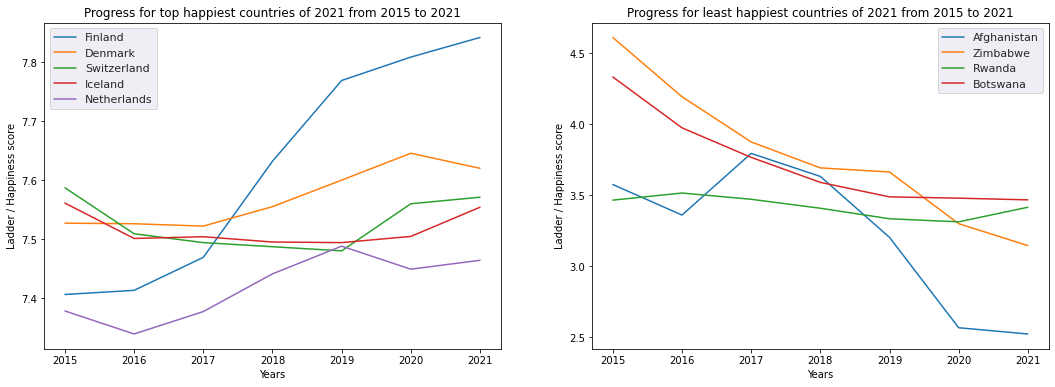

In [20]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.set_theme(palette='hls')

sns.lineplot(y=df_top['Finland'],x=df_top.index, ax = ax[0])
sns.lineplot(y=df_top['Denmark'],x=df_top.index, ax = ax[0])
sns.lineplot(y=df_top['Switzerland'],x=df_top.index, ax = ax[0])
sns.lineplot(y=df_top['Iceland'],x=df_top.index, ax = ax[0])
sns.lineplot(y=df_top['Netherlands'],x=df_top.index, ax = ax[0])
ax[0].legend(top2021)
ax[0].set_title('Progress for top happiest countries of 2021 from 2015 to 2021')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Ladder / Happiness score')

sns.lineplot(y=df_bottom['Afghanistan'],x=df_bottom.index, ax = ax[1])
sns.lineplot(y=df_bottom['Zimbabwe'],x=df_bottom.index, ax = ax[1])
sns.lineplot(y=df_bottom['Rwanda'],x=df_bottom.index, ax = ax[1])
sns.lineplot(y=df_bottom['Botswana'],x=df_bottom.index, ax = ax[1])
ax[1].legend(bottom2021)
ax[1].set_title('Progress for least happiest countries of 2021 from 2015 to 2021')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Ladder / Happiness score')

<a id='section-five-four'></a>
### 5.4 Observations:
#### What made Finland the happiest country in the world?
   There are many reasons why Finland is the happiest country in the world one being that Finns have a strong sense of social support, which comes from family, friends, and the government. Another reason is that Finland has a high GDP per capita, which means that Finns enjoy a high standard of living.  
   
#### What caused Afghanistan to dwindle as the least happiest country in the world?  
   On 29 February 2020, the US, represented by diplomatic envoy Zalmay Khalilzad, and the Taliban signed the Agreement for Bringing Peace to Afghanistan, commonly known as the US–Taliban deal, that provided for the withdrawal from Afghanistan of "all military forces of the United States, its allies, and Coalition partners, including all non-diplomatic civilian personnel, private security contractors, trainers, advisors, and supporting services personnel" within 14 months (i.e., by 1 May 2021).

<a id='section-six'></a>
## 6. How can we stay Happy no matter where we are born?

On the one hand, it seems like lot's of external factors impact our Happiness like Corruption, Money, Social Support, Life expectancy and Freedom but at the end of  the day, none of those matter if you yourself are not satisfied. Coming to terms with reality and reflecting on what you really want with your life play a major role if you have a good life. Having a hobby, good friends, and a fit body can make your life worth to live. Thankfully, making friends or exercising don't even need money, all it will take to be happy is little efforts from your side.

Have a great day ahead :)